In [99]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#For Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [100]:
# Read in CSV files for stock prices
apple = pd.read_csv('CSV Files/AAPL.csv')
facebook = pd.read_csv('CSV Files/FB.csv')
google = pd.read_csv('CSV Files/GOOG.csv')
intel = pd.read_csv('CSV Files/INTC.csv')
microsoft = pd.read_csv('CSV Files/MSFT.csv')
nvidia = pd.read_csv('CSV Files/NVDA.csv')
paypal = pd.read_csv('CSV Files/PYPL.csv')
rapid7 = pd.read_csv('CSV Files/RPD.csv')
synposys = pd.read_csv('CSV Files/SNPS.csv')
splunk = pd.read_csv('CSV Files/SPLK.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-11,95.360001,95.889999,94.860001,95.220001,87.271454,34018000
1,2014-07-14,95.860001,96.889999,95.650002,96.449997,88.398788,42810000
2,2014-07-15,96.800003,96.849998,95.029999,95.320000,87.363113,45477900
3,2014-07-16,96.970001,97.099998,94.739998,94.779999,86.868187,53396300
4,2014-07-17,95.029999,95.279999,92.570000,93.089996,85.319267,57298000


In [101]:
def date_function(data):
    data['Date'] = pd.to_datetime(data.Date ,format='%Y-%m-%d')
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year
    return data


date_function(apple)
date_function(facebook)
date_function(intel)
date_function(microsoft)
date_function(google)
date_function(nvidia)
date_function(paypal)
date_function(synposys)
date_function(splunk)
date_function(rapid7)
rapid7.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2015-07-17,26.750000,27.450001,24.020000,25.280001,25.280001,10609300,17,7,2015
1,2015-07-20,26.000000,26.190001,22.709999,23.100000,23.100000,1660900,20,7,2015
2,2015-07-21,22.799999,23.100000,22.090000,22.940001,22.940001,856200,21,7,2015
3,2015-07-22,22.670000,24.350000,22.570000,23.950001,23.950001,810600,22,7,2015
4,2015-07-23,24.700001,24.850000,23.920000,24.100000,24.100000,459300,23,7,2015


In [102]:
# Create X, Y, x_train, y_train datasets for all Apple, Google, Facebook, Intel, and Microsoft
def train_functions(stock_data):
    X = stock_data[['Month', 'Day', 'Year', 'Open', 'High', 'Low', 'Volume']]
    y = stock_data['Close'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    return (X_train, X_test, y_train, y_test)


In [103]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_functions(apple)
X_train_google, X_test_google, y_train_google, y_test_google = train_functions(google)
X_train_intel, X_test_intel, y_train_intel, y_test_intel = train_functions(intel)
X_train_microsoft, X_test_microsoft, y_train_microsoft, y_test_microsoft = train_functions(microsoft)
X_train_facebook, X_test_facebook, y_train_facebook, y_test_facebook = train_functions(facebook)


In [104]:
model_apple = LinearRegression()
model_apple.fit(X_train_apple, y_train_apple)

model_microsoft = LinearRegression()
model_microsoft.fit(X_train_microsoft, y_train_microsoft)

model_intel = LinearRegression()
model_intel.fit(X_train_intel, y_train_intel)

model_facebook = LinearRegression()
model_facebook.fit(X_train_facebook, y_train_facebook)

model_google = LinearRegression()
model_google.fit(X_train_google, y_train_google)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
### BEGIN SOLUTION
model_apple.fit(X_train_apple, y_train_apple)
training_score = model_apple.score(X_train_apple, y_train_apple)
testing_score = model_apple.score(X_test_apple, y_test_apple)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9995583015483329
Testing Score: 0.9995288694196487


()

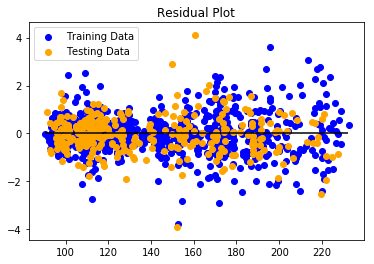

In [106]:
def scatter_stock_chart(data, model, X_train, y_train, X_test, y_test):
    plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=data['Close'].values.reshape(-1,1).min(), xmax=data['Close'].values.reshape(-1,1).max())
    plt.title("Residual Plot")
    return()
### END SOLUTION

scatter_stock_chart(apple, model_apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)


()

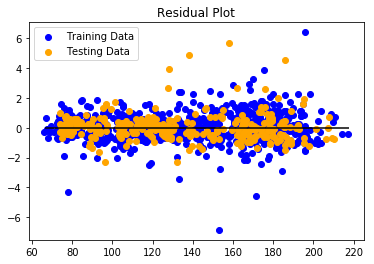

In [107]:
scatter_stock_chart(facebook, model_facebook, X_train_facebook, y_train_facebook, X_test_facebook, y_test_facebook)

()

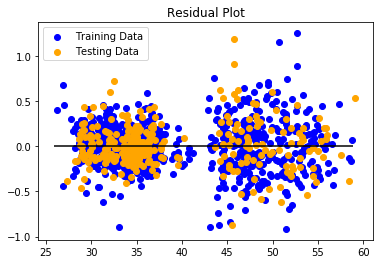

In [108]:
scatter_stock_chart(intel, model_intel, X_train_intel, y_train_intel, X_test_intel, y_test_intel)

()

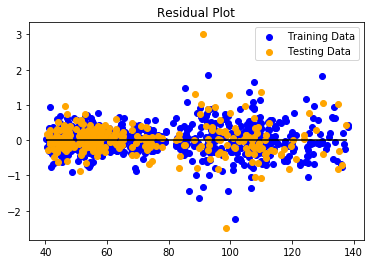

In [109]:
scatter_stock_chart(microsoft, model_microsoft, X_train_microsoft, y_train_microsoft, X_test_microsoft, y_test_microsoft)

()

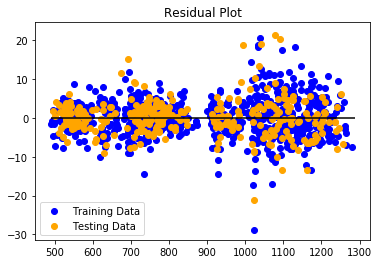

In [110]:
scatter_stock_chart(google, model_google, X_train_google, y_train_google, X_test_google, y_test_google)

In [111]:
def predicted_values(dataset_name, dataset, predicted_model):
    X = dataset[['Month', 'Day', 'Year', 'Open', 'High', 'Low', 'Volume']]
    ml_predicted = predicted_model.predict(X)
    
    dataset[f'Predicted using {dataset_name} model'] = ml_predicted
    return dataset


In [112]:
upcoming_companies = [nvidia, paypal, synposys, splunk, rapid7]

In [113]:
for x in upcoming_companies:
    predicted_values('Facebook', x, model_facebook)

for x in upcoming_companies:
    predicted_values('Intel', x, model_intel)


for x in upcoming_companies:
    predicted_values('Microsoft', x, model_microsoft)
    

for x in upcoming_companies:
    predicted_values('Google', x, model_google)
    
    
for x in upcoming_companies:
    predicted_values('Apple', x, model_apple)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Predicted using Facebook model,Predicted using Intel model,Predicted using Microsoft model,Predicted using Google model,Predicted using Apple model
0,2015-07-06,38.000000,39.750000,36.000000,36.709999,36.709999,5866600,6,7,2015,37.911454,37.880749,38.105673,38.052259,38.479261
1,2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000,7,7,2015,36.447569,36.497848,36.548288,36.297271,36.996663
2,2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700,8,7,2015,34.940318,34.992736,35.043329,35.105187,35.504027
3,2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100,9,7,2015,34.478063,34.593687,34.690441,35.000922,35.102575
4,2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800,10,7,2015,34.405376,34.563361,34.669784,34.825070,35.051637


In [116]:
# Uncoment below to write the Machine Learned CSV files


# rapid7.to_csv('ML_CSV_Files/rapid7_ML.csv')
# splunk.to_csv('ML_CSV_Files/splunk_ML.csv')
# synposys.to_csv('ML_CSV_Files/synposys_ML.csv')
# nvidia.to_csv('ML_CSV_Files/nvidia_ML.csv')
# paypal.to_csv('ML_CSV_Files/paypal_ML.csv')

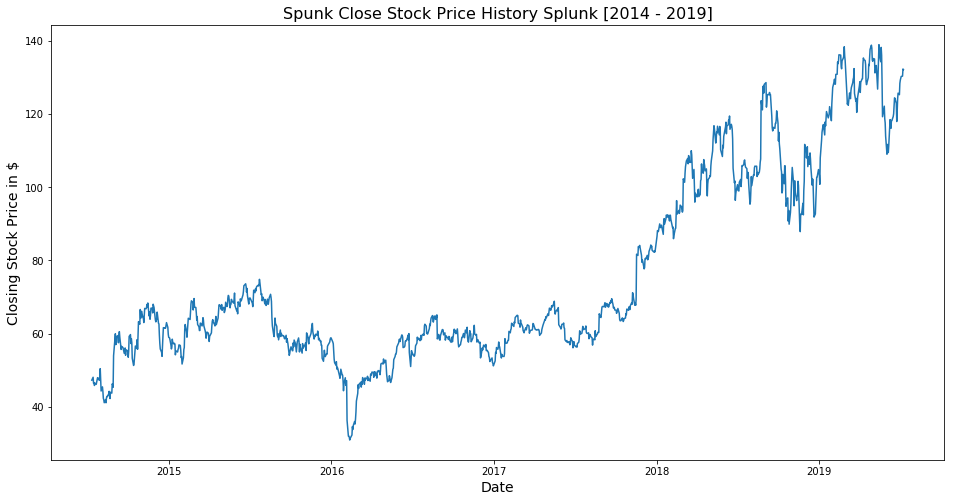

In [119]:
splunk['Date'] = pd.to_datetime(splunk.Date,format='%Y-%m-%d')
splunk.index = splunk['Date']

#plot
plt.figure(figsize=(16,8))
plt.title('Spunk Close Stock Price History Splunk [2014 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

plt.plot(splunk['Close'], label='Close Price history')